In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import umap
import os
import pickle
import pandas as pd
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import chi2
from sklearn.cluster import KMeans

/home/sainero/.conda/envs/style/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
umap_dimensions = [2]
predefined_seeds = [42, 7, 19, 23, 1, 100, 56, 77, 89, 33, 8, 
                    13, 5, 21, 34, 99, 67, 18, 50, 81, 45, 22, 74, 37, 58, 
                    90, 16, 11, 29, 85]

In [3]:
base_path = "../french/embeddings/"
dataset_folders = {
        # "B1_renard" : "B1_renard", 
        # "A1" : "A1_fr", 
        # "A2" : f"A2_fr/A2_{model_gen}_{author}_fr/", 
        # "B" : f"B_fr/B_{author}_fr"
        "Tuffery":"A1_fr", 
        "Proust": "B_fr/B_proust_fr",
        "Celine": "B_fr/B_celine_fr", 
        "Yourcenar":"B_fr/B_yourcenar_fr",
        "Proust_mistral": "A2_fr/A2_mistral_proust_fr",
        "Celine_mistral": "A2_fr/A2_mistral_celine_fr", 
        "Yourcenar_mistral":"A2_fr/A2_mistral_yourcenar_fr",
        "Proust_gemini": "A2_fr/A2_gemini_proust_fr",
        "Celine_gemini": "A2_fr/A2_gemini_celine_fr", 
        "Yourcenar_gemini":"A2_fr/A2_gemini_yourcenar_fr",
        "Proust_gpt": "A2_fr/A2_gpt_proust_fr",
        "Celine_gpt": "A2_fr/A2_gpt_celine_fr", 
        "Yourcenar_gpt":"A2_fr/A2_gpt_yourcenar_fr",
    }

In [4]:
def load_embeddings_from_pickle(embeddings_dir):
    try:
        with open(embeddings_dir, 'rb') as f:
            embeddings = pickle.load(f)
        return embeddings
    except FileNotFoundError as e:
        print(f"File not found: {embeddings_dir}")
        raise e

In [5]:
model_name = "FacebookAI/xlm-roberta-large"

# Load the embeddings for each class
embeddings_dict, distances_dict = {}, {}
for class_name, folder in dataset_folders.items():
    safe_model_name = model_name.replace('/', '_').replace('\\', '_')
    embeddings_dir = os.path.join(base_path, folder, f"{safe_model_name}_embeddings.pkl")
    embeddings_dict[class_name] = load_embeddings_from_pickle(embeddings_dir)
    
    # Calculate distances from the centroid
    # _, distances = calculate_centroid_and_distances(embeddings_dict[class_name])
    # distances_dict[class_name] = distances

In [6]:
embeddings_tuffery = embeddings_dict["Tuffery"]
embeddings_proust = embeddings_dict["Proust"]
embeddings_celine = embeddings_dict["Celine"]
embeddings_yourcenar = embeddings_dict["Yourcenar"]
embeddings_proust_gpt = embeddings_dict["Proust_gpt"]
embeddings_celine_gpt = embeddings_dict["Celine_gpt"]
embeddings_yourcenar_gpt = embeddings_dict["Yourcenar_gpt"]
embeddings_proust_mistral = embeddings_dict["Proust_mistral"]
embeddings_celine_mistral = embeddings_dict["Celine_mistral"]
embeddings_yourcenar_mistral = embeddings_dict["Yourcenar_mistral"]
embeddings_proust_gemini = embeddings_dict["Proust_gemini"]
embeddings_celine_gemini = embeddings_dict["Celine_gemini"]
embeddings_yourcenar_gemini = embeddings_dict["Yourcenar_gemini"]

In [7]:
for seed in predefined_seeds:
    reducer = umap.UMAP(n_components=2, random_state=seed, n_jobs=1)
    all_embeddings = np.concatenate((embeddings_tuffery, embeddings_proust, embeddings_celine, embeddings_yourcenar, 
                                        embeddings_proust_gpt, embeddings_celine_gpt, embeddings_yourcenar_gpt, 
                            embeddings_proust_mistral, embeddings_celine_mistral, embeddings_yourcenar_mistral, 
                            embeddings_proust_gemini, embeddings_celine_gemini, embeddings_yourcenar_gemini), axis=0)
    reducer.fit(all_embeddings)

In [8]:
transformed_tuffery = reducer.transform(embeddings_tuffery)
transformed_proust = reducer.transform(embeddings_proust)
transformed_celine = reducer.transform(embeddings_celine)
transformed_yourcenar = reducer.transform(embeddings_yourcenar)
transformed_proust_gpt = reducer.transform(embeddings_proust_gpt)
transformed_celine_gpt = reducer.transform(embeddings_celine_gpt)
transformed_yourcenar_gpt = reducer.transform(embeddings_yourcenar_gpt)
transformed_proust_mistral = reducer.transform(embeddings_proust_mistral)
transformed_celine_mistral = reducer.transform(embeddings_celine_mistral)
transformed_yourcenar_mistral = reducer.transform(embeddings_yourcenar_mistral)
transformed_proust_gemini = reducer.transform(embeddings_proust_gemini)
transformed_celine_gemini = reducer.transform(embeddings_celine_gemini)
transformed_yourcenar_gemini = reducer.transform(embeddings_yourcenar_gemini)

In [9]:
def purity_score(y_true, y_pred):
    """
    Calculate the purity score for the clustering results.
    """
    contingency_matrix = pd.crosstab(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)

def apply_kmeans(data, n_clusters=4):
    """
    Apply KMeans clustering to the given data.
    """
    model = KMeans(n_clusters=n_clusters, random_state=0)
    labels = model.fit_predict(data)
    return labels + 1, model

def cluster_and_evaluate(data, labels, method_name, dimensionality, model_name, results):
    """
    Perform clustering and evaluation, then save the results.
    """
    y_pred, _ = apply_kmeans(data)
    purity = purity_score(labels, y_pred)
    results.append((model_name, method_name, dimensionality, purity, nmi))

# Pour k = 7

In [10]:
class_tuffery = transformed_tuffery
class_proust = transformed_proust
class_celine = transformed_celine
class_yourcenar = transformed_yourcenar
class_proust_gen = np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini))
class_celine_gen = np.concatenate((transformed_celine_gpt, transformed_celine_mistral, transformed_celine_gemini))    
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini))     

data = np.concatenate((class_tuffery, class_proust, class_celine, class_yourcenar, class_proust_gen, class_celine_gen, class_yourcenar_gen))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_proust),
                         [2]*len(class_celine),
                         [3]*len(class_yourcenar),
                         [4]*len(class_proust_gen),
                         [5]*len(class_celine_gen),
                         [6]*len(class_yourcenar_gen),
                         ))

results = np.array(apply_kmeans(data, n_clusters=7)[0])

In [11]:

print(results)

[4 3 1 ... 1 6 2]


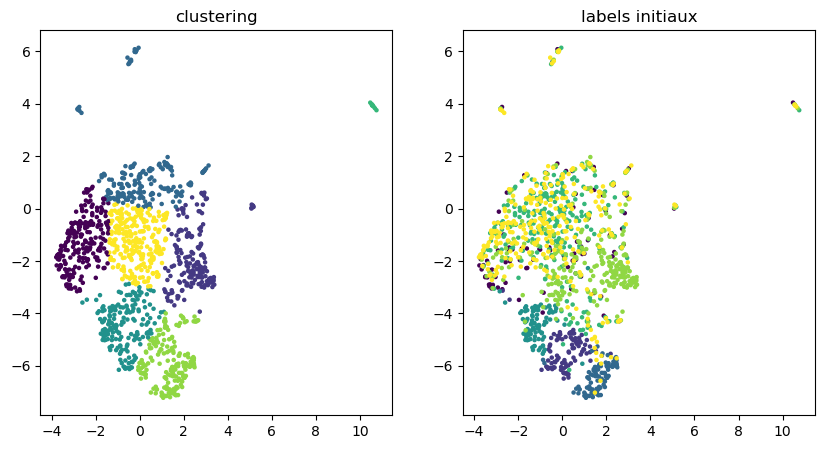

In [12]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].scatter(data[:,0], data[:,1], c=results, s=5)
axs[1].scatter(data[:,0], data[:,1], c=labels, s=5)

axs[0].set_title("clustering")
axs[1].set_title("labels initiaux")
plt.show()

In [13]:
purity = purity_score(labels, results)

In [14]:
purity

0.4623397435897436

# Pour k=3

[2 3 1 ... 1 2 3]


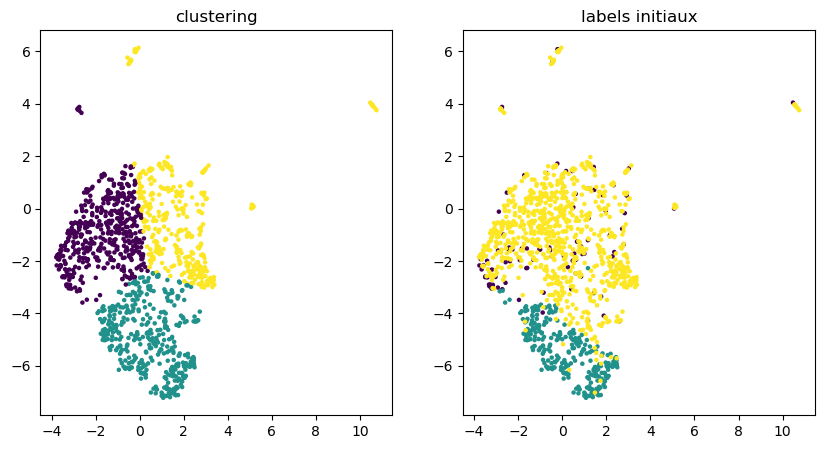

0.8213141025641025

In [15]:
class_tuffery = transformed_tuffery
class_B1 = np.concatenate((transformed_proust, transformed_celine, transformed_yourcenar))
class_proust_gen = np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini))
class_celine_gen = np.concatenate((transformed_celine_gpt, transformed_celine_mistral, transformed_celine_gemini))    
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini))    
class_A2 = np.concatenate((class_proust_gen, class_celine_gen, class_yourcenar_gen))

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_B1),
                         [2]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])
print(results)
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].scatter(data[:,0], data[:,1], c=results, s=5)
axs[1].scatter(data[:,0], data[:,1], c=labels, s=5)

axs[0].set_title("clustering")
axs[1].set_title("labels initiaux")
plt.show()
purity = purity_score(labels, results)
purity

# Juste un trio

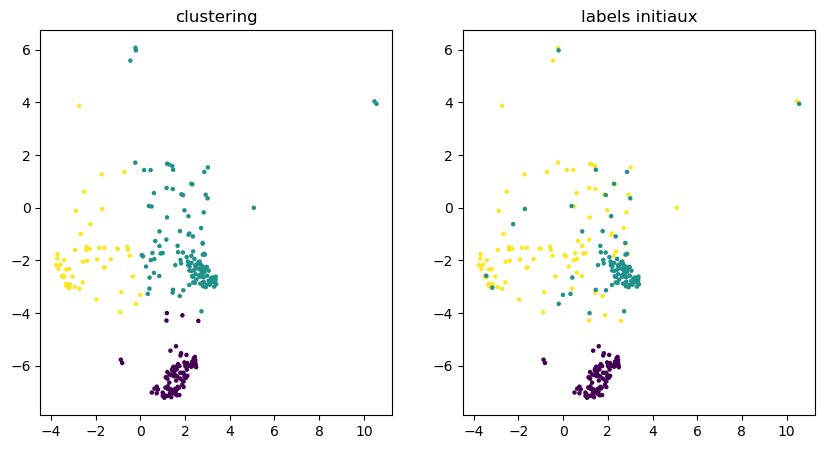

0.8125

In [16]:
class_tuffery = transformed_tuffery
class_B1 = transformed_celine  
class_A2 = transformed_celine_gemini

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([2]*len(class_tuffery), 
                         [0]*len(class_B1),
                         [1]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])

fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].scatter(data[:,0], data[:,1], c=results, s=5)
axs[1].scatter(data[:,0], data[:,1], c=labels, s=5)

axs[0].set_title("clustering")
axs[1].set_title("labels initiaux")
# axs[1].legend()
plt.show()
purity = purity_score(labels, results)
purity

# Plots pour le papier 

In [17]:
transformed_tuffery[:, [0, 1]] = transformed_tuffery[:, [1, 0]]
transformed_proust[:, [0, 1]] = transformed_proust[:, [1, 0]]
transformed_celine[:, [0, 1]] = transformed_celine[:, [1, 0]]
transformed_yourcenar[:, [0, 1]] = transformed_yourcenar[:, [1, 0]]
transformed_proust_gpt[:, [0, 1]] = transformed_proust_gpt[:, [1, 0]]
transformed_celine_gpt[:, [0, 1]] = transformed_celine_gpt[:, [1, 0]]
transformed_yourcenar_gpt[:, [0, 1]] = transformed_yourcenar_gpt[:, [1, 0]]
transformed_proust_mistral[:, [0, 1]] = transformed_proust_mistral[:, [1, 0]]
transformed_celine_mistral[:, [0, 1]] = transformed_celine_mistral[:, [1, 0]]
transformed_yourcenar_mistral[:, [0, 1]] = transformed_yourcenar_mistral[:, [1, 0]]
transformed_proust_gemini[:, [0, 1]] = transformed_proust_gemini[:, [1, 0]]
transformed_celine_gemini[:, [0, 1]] = transformed_celine_gemini[:, [1, 0]]
transformed_yourcenar_gemini[:, [0, 1]] = transformed_yourcenar_gemini[:, [1, 0]]

In [18]:
from matplotlib.colors import ListedColormap
# my_colors = {"0":"black", "1":"grey", "2":"lightgrey"}
my_colors = ["black","grey","lightgrey"]
cmap = ListedColormap(my_colors)


import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

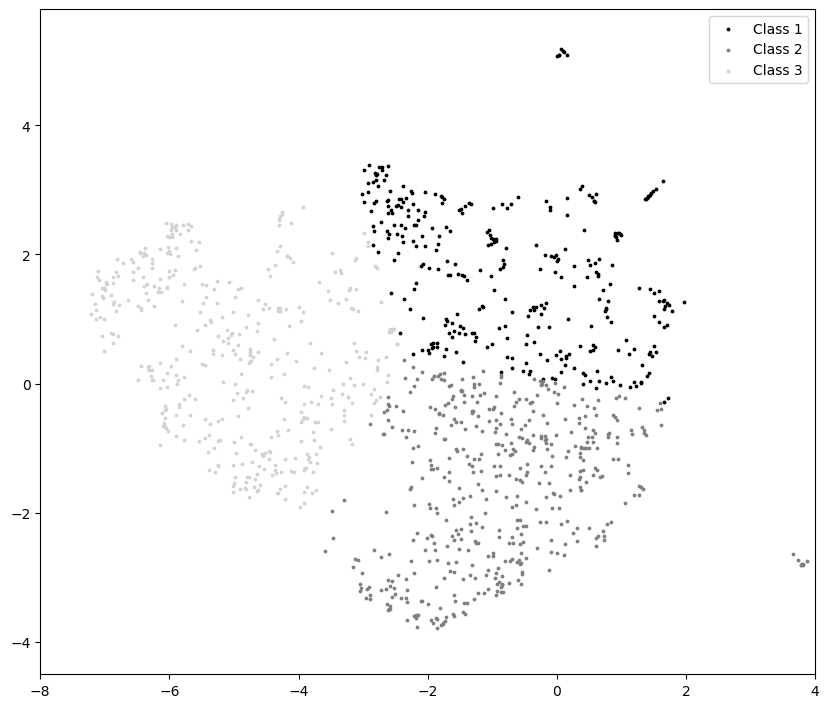

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

# 90% confidence => n_std ≈ sqrt(chi2.ppf(0.9, df=2))
# n_std = np.sqrt(chi2.ppf(0.7, df=2))  # ~2.146

# ax.scatter(transformed_tuffery[:, 0], transformed_tuffery[:, 1], c='black',  s=3)

# ax.scatter(transformed_yourcenar[:, 0], transformed_yourcenar[:, 1], c='grey', s=3)
# ax.scatter(transformed_proust[:, 0], transformed_proust[:, 1], c='grey', s=3)
# ax.scatter(transformed_celine[:, 0], transformed_celine[:, 1], c='grey', s=3)

# ax.scatter(transformed_yourcenar_gpt[:, 0], transformed_yourcenar_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_mistral[:, 0], transformed_yourcenar_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_gemini[:, 0], transformed_yourcenar_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_proust_gpt[:, 0], transformed_proust_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_mistral[:, 0], transformed_proust_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_gemini[:, 0], transformed_proust_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_celine_mistral[:, 0], transformed_celine_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gpt[:, 0], transformed_celine_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gemini[:, 0], transformed_celine_gemini[:, 1], c='lightgrey', s=3)

class_tuffery = transformed_tuffery
class_B1 = np.concatenate((transformed_proust, transformed_celine, transformed_yourcenar))
class_proust_gen = np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini))
class_celine_gen = np.concatenate((transformed_celine_gpt, transformed_celine_mistral, transformed_celine_gemini))    
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini))    
class_A2 = np.concatenate((class_proust_gen, class_celine_gen, class_yourcenar_gen))

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_B1),
                         [2]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])

# Create masks and filtered arrays
data_0 = data[results == 3]
data_1 = data[results == 1]
data_2 = data[results == 2]

ax.scatter(data_0[:,0], data_0[:,1], c="black", s=3, label="Class 1")
ax.scatter(data_1[:,0], data_1[:,1], c="grey", s=3, label="Class 2")
ax.scatter(data_2[:,0], data_2[:,1], c="lightgrey", s=3, label="Class 3")

# Draw ellipses
# plot_confidence_ellipse(transformed_tuffery, ax, n_std=n_std, edgecolor='darkblue', label='TUFFERY_REF')
# # # plot_confidence_ellipse(transformed_yourcenar, ax, n_std=n_std, edgecolor='darkred', label ='Yourcenar')
# plot_confidence_ellipse(np.concatenate((transformed_proust,transformed_yourcenar, transformed_celine)), ax, n_std=n_std, edgecolor='red', label='STYLE_REF')
# # # plot_confidence_ellipse(transformed_celine, ax, n_std=n_std, edgecolor='pink', label ='Celine')

# # # plot_confidence_ellipse(np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini)), ax, n_std=n_std, edgecolor='brown', label ='Yourcenar - all genAI')
# plot_confidence_ellipse(np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini, 
#                                         transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini, 
#                                         transformed_celine_mistral, transformed_celine_gpt, transformed_celine_gemini)), 
#                         ax, n_std=n_std, edgecolor='orange', label='STYLE_GEN')
# plot_confidence_ellipse(np.concatenate((transformed_celine_mistral, transformed_celine_gpt, transformed_celine_gemini)), ax, n_std=n_std, edgecolor='yellow', label ='Celine - all genAI')
# plot_confidence_ellipse(transformed_proust, ax, n_std=n_std, edgecolor='red')
# plot_confidence_ellipse(transformed_celine, ax, n_std=n_std, edgecolor='darkred')


ax.set_aspect('equal')
ax.set_ylim(-4.5, 5.8)
ax.set_xlim(-8, 4)
ax.legend(loc='upper right')
# plt.gca().invert_yaxis()
plt.show()

In [20]:
def plot_confidence_ellipse(data, ax, n_std=2.146, edgecolor='black', **kwargs):
    """
    Plots an ellipse representing a confidence region for a 2D Gaussian.
    n_std = 2.146 corresponds to ~90% confidence level for 2D Gaussian.
    """
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    
    # Compute the eigenvalues and eigenvectors
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(vals)  # scale for confidence ellipse

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta,
                      edgecolor=edgecolor, facecolor='none', lw=2, linestyle='--', **kwargs)
    
    return(ax.add_patch(ellipse))

n_std = np.sqrt(chi2.ppf(0.7, df=2)) 

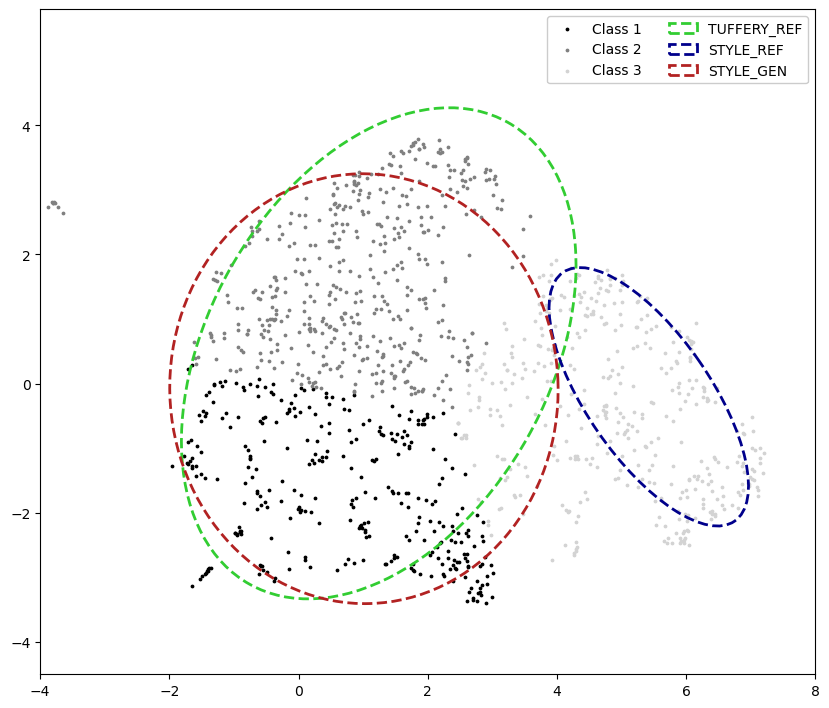

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

# 90% confidence => n_std ≈ sqrt(chi2.ppf(0.9, df=2))
# n_std = np.sqrt(chi2.ppf(0.7, df=2))  # ~2.146

# ax.scatter(transformed_tuffery[:, 0], transformed_tuffery[:, 1], c='black',  s=3)

# ax.scatter(transformed_yourcenar[:, 0], transformed_yourcenar[:, 1], c='grey', s=3)
# ax.scatter(transformed_proust[:, 0], transformed_proust[:, 1], c='grey', s=3)
# ax.scatter(transformed_celine[:, 0], transformed_celine[:, 1], c='grey', s=3)

# ax.scatter(transformed_yourcenar_gpt[:, 0], transformed_yourcenar_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_mistral[:, 0], transformed_yourcenar_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_gemini[:, 0], transformed_yourcenar_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_proust_gpt[:, 0], transformed_proust_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_mistral[:, 0], transformed_proust_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_gemini[:, 0], transformed_proust_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_celine_mistral[:, 0], transformed_celine_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gpt[:, 0], transformed_celine_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gemini[:, 0], transformed_celine_gemini[:, 1], c='lightgrey', s=3)

transformed_tuffery_copy = - transformed_tuffery
transformed_proust_copy = - transformed_proust
transformed_celine_copy = - transformed_celine
transformed_yourcenar_copy = - transformed_yourcenar
transformed_proust_gpt_copy = - transformed_proust_gpt
transformed_proust_mistral_copy = - transformed_proust_mistral
transformed_proust_gemini_copy = - transformed_proust_gemini
transformed_celine_gpt_copy = - transformed_celine_gpt
transformed_celine_mistral_copy = - transformed_celine_mistral
transformed_celine_gemini_copy = - transformed_celine_gemini
transformed_yourcenar_gpt_copy = - transformed_yourcenar_gpt
transformed_yourcenar_mistral_copy = - transformed_yourcenar_mistral
transformed_yourcenar_gemini_copy = - transformed_yourcenar_gemini

class_tuffery = transformed_tuffery_copy
class_B1 = np.concatenate((transformed_proust_copy, transformed_celine_copy, transformed_yourcenar_copy))
class_proust_gen = np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy))
class_celine_gen = np.concatenate((transformed_celine_gpt_copy, transformed_celine_mistral_copy, transformed_celine_gemini_copy))    
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy))    
class_A2 = np.concatenate((class_proust_gen, class_celine_gen, class_yourcenar_gen))

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_B1),
                         [2]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])

# Create masks and filtered arrays
data_0 = data[results == 3]
data_1 = data[results == 1]
data_2 = data[results == 2]

ax.scatter(data_0[:,0], data_0[:,1], c="black", s=3, label="Class 1")
ax.scatter(data_1[:,0], data_1[:,1], c="grey", s=3, label="Class 2")
ax.scatter(data_2[:,0], data_2[:,1], c="lightgrey", s=3, label="Class 3")

# Draw ellipses
plot_confidence_ellipse(transformed_tuffery_copy, ax, n_std=n_std, edgecolor='limegreen', label='TUFFERY_REF')
# # # plot_confidence_ellipse(transformed_yourcenar, ax, n_std=n_std, edgecolor='darkred', label ='Yourcenar')
plot_confidence_ellipse(np.concatenate((transformed_proust_copy,transformed_yourcenar_copy, transformed_celine_copy)), ax, n_std=n_std, edgecolor='darkblue', label='STYLE_REF')
# # # plot_confidence_ellipse(transformed_celine, ax, n_std=n_std, edgecolor='pink', label ='Celine')

# # # plot_confidence_ellipse(np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini)), ax, n_std=n_std, edgecolor='brown', label ='Yourcenar - all genAI')
plot_confidence_ellipse(np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy, 
                                        transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy, 
                                        transformed_celine_mistral_copy, transformed_celine_gpt_copy, transformed_celine_gemini_copy)), 
                        ax, n_std=n_std, edgecolor='firebrick', label='STYLE_GEN')
# plot_confidence_ellipse(np.concatenate((transformed_celine_mistral, transformed_celine_gpt, transformed_celine_gemini)), ax, n_std=n_std, edgecolor='yellow', label ='Celine - all genAI')
# plot_confidence_ellipse(transformed_proust, ax, n_std=n_std, edgecolor='red')
# plot_confidence_ellipse(transformed_celine, ax, n_std=n_std, edgecolor='darkred')

ax.set_aspect('equal')
ax.set_ylim(-4.5, 5.8)
ax.set_xlim(-4, 8)
ax.legend(loc='upper right',
          ncol=2, 
          framealpha=1)
# plt.gca().invert_yaxis()
plt.show()

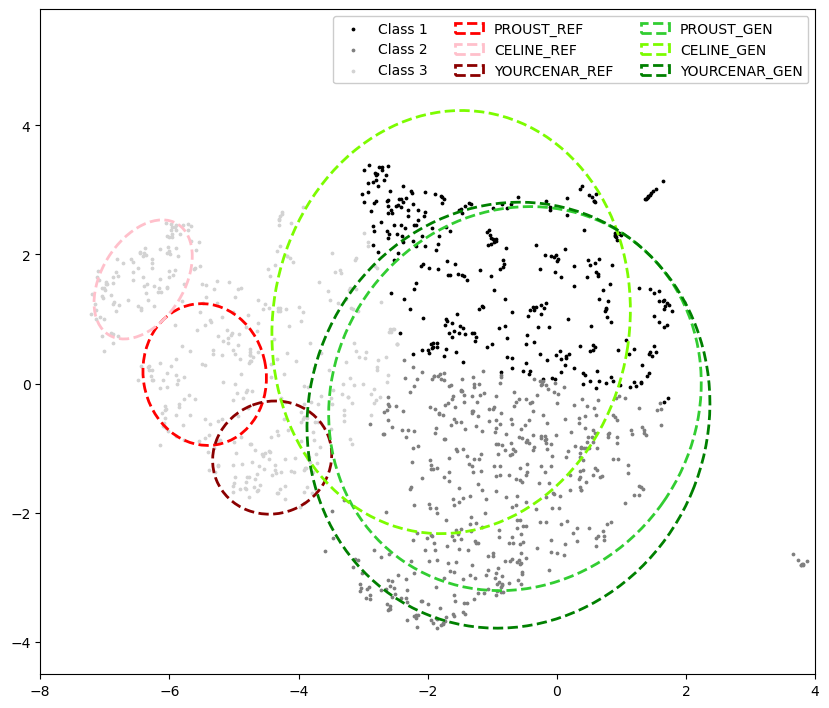

In [22]:
n_std = np.sqrt(chi2.ppf(0.7, df=2)) 

fig, ax = plt.subplots(figsize=(10, 10))

# 90% confidence => n_std ≈ sqrt(chi2.ppf(0.9, df=2))
# n_std = np.sqrt(chi2.ppf(0.7, df=2))  # ~2.146

# ax.scatter(transformed_tuffery[:, 0], transformed_tuffery[:, 1], c='black',  s=3)

# ax.scatter(transformed_yourcenar[:, 0], transformed_yourcenar[:, 1], c='grey', s=3)
# ax.scatter(transformed_proust[:, 0], transformed_proust[:, 1], c='grey', s=3)
# ax.scatter(transformed_celine[:, 0], transformed_celine[:, 1], c='grey', s=3)

# ax.scatter(transformed_yourcenar_gpt[:, 0], transformed_yourcenar_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_mistral[:, 0], transformed_yourcenar_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_gemini[:, 0], transformed_yourcenar_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_proust_gpt[:, 0], transformed_proust_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_mistral[:, 0], transformed_proust_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_gemini[:, 0], transformed_proust_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_celine_mistral[:, 0], transformed_celine_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gpt[:, 0], transformed_celine_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gemini[:, 0], transformed_celine_gemini[:, 1], c='lightgrey', s=3)

class_tuffery = transformed_tuffery
class_B1 = np.concatenate((transformed_proust, transformed_celine, transformed_yourcenar))
class_proust_gen = np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini))
class_celine_gen = np.concatenate((transformed_celine_gpt, transformed_celine_mistral, transformed_celine_gemini))    
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini))    
class_A2 = np.concatenate((class_proust_gen, class_celine_gen, class_yourcenar_gen))

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_B1),
                         [2]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])

# Create masks and filtered arrays
data_0 = data[results == 3]
data_1 = data[results == 1]
data_2 = data[results == 2]

lines = []

lines.append(ax.scatter(data_0[:,0], data_0[:,1], c="black", s=3, label="Class 1"))
lines.append(ax.scatter(data_1[:,0], data_1[:,1], c="grey", s=3, label="Class 2"))
lines.append(ax.scatter(data_2[:,0], data_2[:,1], c="lightgrey", s=3, label="Class 3"))
# Draw ellipses
# lines.append(plot_confidence_ellipse(transformed_tuffery, ax, n_std=n_std, edgecolor='darkblue', label='TUFFERY_REF'))
lines.append(plot_confidence_ellipse(transformed_proust, ax, n_std=n_std, edgecolor='red', label ='PROUST_REF'))
lines.append(plot_confidence_ellipse(transformed_celine, ax, n_std=n_std, edgecolor='pink', label ='CELINE_REF'))
lines.append(plot_confidence_ellipse(transformed_yourcenar, ax, n_std=n_std, edgecolor='darkred', label ='YOURCENAR_REF'))

lines.append(plot_confidence_ellipse(np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini)), ax, n_std=n_std, edgecolor='limegreen', label ='PROUST_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_celine_mistral, transformed_celine_gpt, transformed_celine_gemini)), ax, n_std=n_std, edgecolor='lawngreen', label ='CELINE_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini)), ax, n_std=n_std, edgecolor='green', label ='YOURCENAR_GEN'))

ax.set_aspect('equal')
ax.set_ylim(-4.5, 5.8)
ax.set_xlim(-8, 4)

# labels = ["Class 1", "Class 2", "Class 3", 
#           'TUFFERY_REF', 'PROUST_REF', 'CELINE_REF', 'YOURCENAR_REF', 
#           'PROUST_GEN', 'CELINE_GEN', 'YOURCENAR_GEN'
#           ]

# Group the legend items
# group1 = list(zip(lines[:3], labels[:3]))   # First 3
# group2 = list(zip(lines[3:7], labels[3:7]))  # Next 4
# group3 = list(zip(lines[7:], labels[7:]))   # Last 3

# # Flatten the groups column-wise (group1, group2, group3) → for vertical stacking in columns
# new_lines = []
# new_labels = []
# for i in range(max(len(group1), len(group2), len(group3))):
#     for group in [group1, group2, group3]:
#         if i < len(group):
#             line, label = group[i]
#             new_lines.append(line)
#             new_labels.append(label)


ax.legend(
    # new_lines, new_labels, 
          loc='upper right', 
          ncol=3, 
          framealpha=1)
# plt.gca().invert_yaxis()
plt.show()

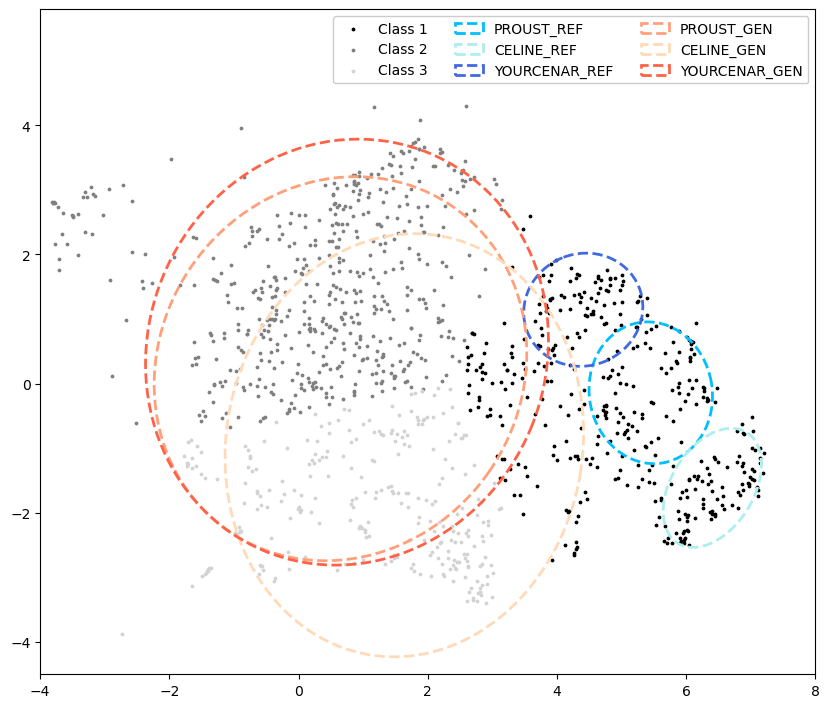

In [23]:
n_std = np.sqrt(chi2.ppf(0.7, df=2)) 

fig, ax = plt.subplots(figsize=(10, 10))

# 90% confidence => n_std ≈ sqrt(chi2.ppf(0.9, df=2))
# n_std = np.sqrt(chi2.ppf(0.7, df=2))  # ~2.146

# ax.scatter(transformed_tuffery[:, 0], transformed_tuffery[:, 1], c='black',  s=3)

# ax.scatter(transformed_yourcenar[:, 0], transformed_yourcenar[:, 1], c='grey', s=3)
# ax.scatter(transformed_proust[:, 0], transformed_proust[:, 1], c='grey', s=3)
# ax.scatter(transformed_celine[:, 0], transformed_celine[:, 1], c='grey', s=3)

# ax.scatter(transformed_yourcenar_gpt[:, 0], transformed_yourcenar_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_mistral[:, 0], transformed_yourcenar_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_gemini[:, 0], transformed_yourcenar_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_proust_gpt[:, 0], transformed_proust_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_mistral[:, 0], transformed_proust_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_gemini[:, 0], transformed_proust_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_celine_mistral[:, 0], transformed_celine_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gpt[:, 0], transformed_celine_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gemini[:, 0], transformed_celine_gemini[:, 1], c='lightgrey', s=3)

class_tuffery = transformed_tuffery
class_tuffery[:, [0, 1]] = class_tuffery[:, [1, 0]]
class_tuffery[:, 1] = - class_tuffery[:, 1] 

transformed_proust_copy = - transformed_proust
# transformed_proust_copy[:, 0] = - transformed_proust_copy[:, 0] 
transformed_celine_copy = - transformed_celine
# transformed_celine_copy[:, 0] = - transformed_celine_copy[:, 0] 
transformed_yourcenar_copy = - transformed_yourcenar
# transformed_yourcenar_copy[:, 0] = - transformed_yourcenar_copy[:, 0] 
class_B1 = np.concatenate((transformed_proust_copy, transformed_celine_copy, transformed_yourcenar_copy))


transformed_proust_gpt_copy = - transformed_proust_gpt
# transformed_proust_gpt_copy[:, 0] = - transformed_proust_gpt_copy[:, 0] 
transformed_proust_mistral_copy = - transformed_proust_mistral
# transformed_proust_mistral_copy[:, 0] = - transformed_proust_mistral_copy[:, 0] 
transformed_proust_gemini_copy = - transformed_proust_gemini
# transformed_proust_gemini_copy[:, 0] = - transformed_proust_gemini_copy[:, 0] 
class_proust_gen = np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy))

transformed_celine_gpt_copy = - transformed_celine_gpt
# transformed_celine_gpt_copy[:, 0] = - transformed_celine_gpt_copy[:, 0] 
transformed_celine_mistral_copy = - transformed_celine_mistral
# transformed_celine_mistral_copy[:, 0] = - transformed_celine_mistral_copy[:, 0] 
transformed_celine_gemini_copy = - transformed_celine_gemini
# transformed_celine_gemini_copy[:, 0] = - transformed_celine_gemini_copy[:, 0] 
class_celine_gen = np.concatenate((transformed_celine_gpt_copy, transformed_celine_mistral_copy, transformed_celine_gemini_copy))    

transformed_yourcenar_gpt_copy = - transformed_yourcenar_gpt
# transformed_yourcenar_gpt_copy[:, 0] = - transformed_yourcenar_gpt_copy[:, 0] 
transformed_yourcenar_mistral_copy = - transformed_yourcenar_mistral
# transformed_yourcenar_mistral_copy[:, 0] = - transformed_yourcenar_mistral_copy[:, 0] 
transformed_yourcenar_gemini_copy = - transformed_yourcenar_gemini
# transformed_yourcenar_gemini_copy[:, 0] = - transformed_celine_gemini_copy[:, 0] 
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy)) 

class_A2 = np.concatenate((class_proust_gen, class_celine_gen, class_yourcenar_gen))

data = np.concatenate((class_tuffery, class_B1, class_A2))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_B1),
                         [2]*len(class_A2),
                         ))
results = np.array(apply_kmeans(data, n_clusters=3)[0])

# Create masks and filtered arrays
data_0 = data[results == 3]
data_1 = data[results == 1]
data_2 = data[results == 2]

lines = []

lines.append(ax.scatter(data_0[:,0], data_0[:,1], c="black", s=3, label="Class 1"))
lines.append(ax.scatter(data_1[:,0], data_1[:,1], c="grey", s=3, label="Class 2"))
lines.append(ax.scatter(data_2[:,0], data_2[:,1], c="lightgrey", s=3, label="Class 3"))

# lines.append(ax.scatter(data_0[:,1], data_0[:,0], c="black", s=3, label="Class 1"))
# lines.append(ax.scatter(data_1[:,1], data_1[:,0], c="grey", s=3, label="Class 2"))
# lines.append(ax.scatter(data_2[:,1], data_2[:,0], c="lightgrey", s=3, label="Class 3"))

# # Draw ellipses"paleturquoise", "deepskyblue", "royalblue"
# # lines.append(plot_confidence_ellipse(transformed_tuffery, ax, n_std=n_std, edgecolor='darkblue', label='TUFFERY_REF'))
lines.append(plot_confidence_ellipse(transformed_proust_copy, ax, n_std=n_std, edgecolor='deepskyblue', label ='PROUST_REF'))
lines.append(plot_confidence_ellipse(transformed_celine_copy, ax, n_std=n_std, edgecolor='paleturquoise', label ='CELINE_REF'))
lines.append(plot_confidence_ellipse(transformed_yourcenar_copy, ax, n_std=n_std, edgecolor='royalblue', label ='YOURCENAR_REF'))

# lines.append(plot_confidence_ellipse(transformed_tuffery, ax, n_std=n_std, edgecolor='darkblue', label='TUFFERY_REF'))
# lines.append(plot_confidence_ellipse(transformed_proust, ax, n_std=n_std, edgecolor='deepskyblue', label ='PROUST_REF'))
# lines.append(plot_confidence_ellipse(transformed_celine, ax, n_std=n_std, edgecolor='paleturquoise', label ='CELINE_REF'))
# lines.append(plot_confidence_ellipse(transformed_yourcenar, ax, n_std=n_std, edgecolor='royalblue', label ='YOURCENAR_REF'))

lines.append(plot_confidence_ellipse(np.concatenate((transformed_proust_gpt_copy, transformed_proust_mistral_copy, transformed_proust_gemini_copy)), ax, n_std=n_std, edgecolor='lightsalmon', label ='PROUST_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_celine_mistral_copy, transformed_celine_gpt_copy, transformed_celine_gemini_copy)), ax, n_std=n_std, edgecolor='peachpuff', label ='CELINE_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_yourcenar_gpt_copy, transformed_yourcenar_mistral_copy, transformed_yourcenar_gemini_copy)), ax, n_std=n_std, edgecolor='tomato', label ='YOURCENAR_GEN'))

ax.set_aspect('equal')
ax.set_ylim(-4.5, 5.8)
ax.set_xlim(-4, 8)
# ax.set_xlim(-5, 5.8)
# ax.set_ylim(-8, 4)

# labels = ["Class 1", "Class 2", "Class 3", 
#           'TUFFERY_REF', 'PROUST_REF', 'CELINE_REF', 'YOURCENAR_REF', 
#           'PROUST_GEN', 'CELINE_GEN', 'YOURCENAR_GEN'
#           ]

# Group the legend items
# group1 = list(zip(lines[:3], labels[:3]))   # First 3
# group2 = list(zip(lines[3:7], labels[3:7]))  # Next 4
# group3 = list(zip(lines[7:], labels[7:]))   # Last 3

# # Flatten the groups column-wise (group1, group2, group3) → for vertical stacking in columns
# new_lines = []
# new_labels = []
# for i in range(max(len(group1), len(group2), len(group3))):
#     for group in [group1, group2, group3]:
#         if i < len(group):
#             line, label = group[i]
#             new_lines.append(line)
#             new_labels.append(label)


ax.legend(
    # new_lines, new_labels, 
          loc='upper right', 
          ncol=3, 
          framealpha=1)
# plt.gca().invert_yaxis()
plt.show()

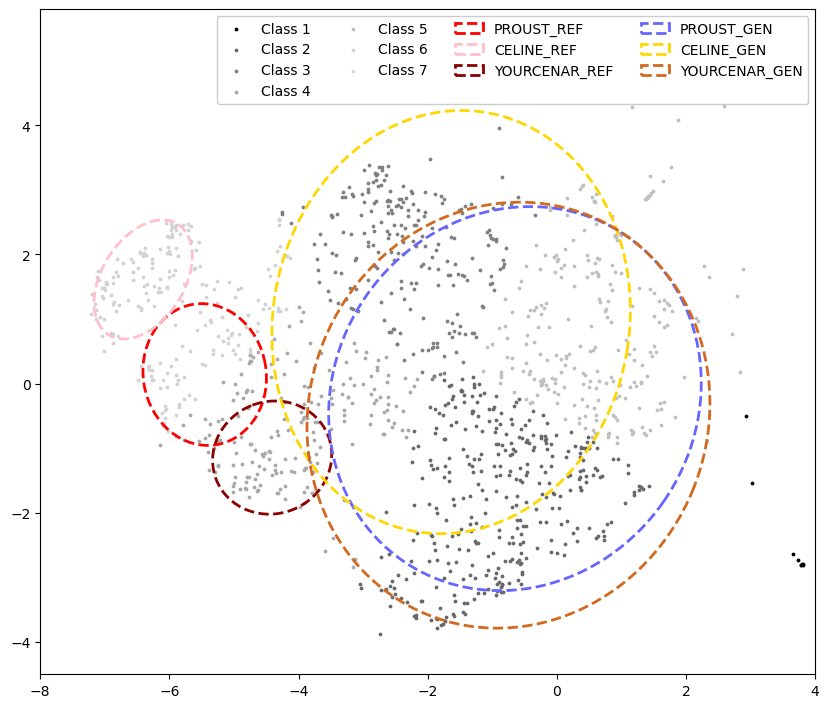

In [24]:
n_std = np.sqrt(chi2.ppf(0.7, df=2)) 

fig, ax = plt.subplots(figsize=(10, 10))

# 90% confidence => n_std ≈ sqrt(chi2.ppf(0.9, df=2))
# n_std = np.sqrt(chi2.ppf(0.7, df=2))  # ~2.146

# ax.scatter(transformed_tuffery[:, 0], transformed_tuffery[:, 1], c='black',  s=3)

# ax.scatter(transformed_yourcenar[:, 0], transformed_yourcenar[:, 1], c='grey', s=3)
# ax.scatter(transformed_proust[:, 0], transformed_proust[:, 1], c='grey', s=3)
# ax.scatter(transformed_celine[:, 0], transformed_celine[:, 1], c='grey', s=3)

# ax.scatter(transformed_yourcenar_gpt[:, 0], transformed_yourcenar_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_mistral[:, 0], transformed_yourcenar_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_yourcenar_gemini[:, 0], transformed_yourcenar_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_proust_gpt[:, 0], transformed_proust_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_mistral[:, 0], transformed_proust_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_proust_gemini[:, 0], transformed_proust_gemini[:, 1], c='lightgrey', s=3)

# ax.scatter(transformed_celine_mistral[:, 0], transformed_celine_mistral[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gpt[:, 0], transformed_celine_gpt[:, 1], c='lightgrey', s=3)
# ax.scatter(transformed_celine_gemini[:, 0], transformed_celine_gemini[:, 1], c='lightgrey', s=3)

class_tuffery = transformed_tuffery
class_proust = transformed_proust
class_celine = transformed_celine
class_yourcenar = transformed_yourcenar
class_proust_gen = np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini))
class_celine_gen = np.concatenate((transformed_celine_gpt, transformed_celine_mistral, transformed_celine_gemini))    
class_yourcenar_gen = np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini))     

data = np.concatenate((class_tuffery, class_proust, class_celine, class_yourcenar, class_proust_gen, class_celine_gen, class_yourcenar_gen))
labels = np.concatenate(([0]*len(class_tuffery), 
                         [1]*len(class_proust),
                         [2]*len(class_celine),
                         [3]*len(class_yourcenar),
                         [4]*len(class_proust_gen),
                         [5]*len(class_celine_gen),
                         [6]*len(class_yourcenar_gen),
                         ))

results = np.array(apply_kmeans(data, n_clusters=7)[0])

# Create masks and filtered arrays
data_0 = data[results == 3]
data_1 = data[results == 1]
data_2 = data[results == 2]
data_3 = data[results == 4]
data_4 = data[results == 5]
data_5 = data[results == 6]
data_6 = data[results == 7]

lines = []

lines.append(ax.scatter(data_0[:,0], data_0[:,1], c="black", s=3, label="Class 1"))
lines.append(ax.scatter(data_1[:,0], data_1[:,1], c="dimgrey", s=3, label="Class 2"))
lines.append(ax.scatter(data_2[:,0], data_2[:,1], c="grey", s=3, label="Class 3"))
lines.append(ax.scatter(data_3[:,0], data_3[:,1], c="darkgrey", s=3, label="Class 4"))
lines.append(ax.scatter(data_4[:,0], data_4[:,1], c="silver", s=3, label="Class 5"))
lines.append(ax.scatter(data_5[:,0], data_5[:,1], c="lightgrey", s=3, label="Class 6"))
lines.append(ax.scatter(data_6[:,0], data_6[:,1], c="gainsboro", s=3, label="Class 7"))

# Draw ellipses
# lines.append(plot_confidence_ellipse(transformed_tuffery, ax, n_std=n_std, edgecolor='darkblue', label='TUFFERY_REF'))
lines.append(plot_confidence_ellipse(transformed_proust, ax, n_std=n_std, edgecolor='red', label ='PROUST_REF'))
lines.append(plot_confidence_ellipse(transformed_celine, ax, n_std=n_std, edgecolor='pink', label ='CELINE_REF'))
lines.append(plot_confidence_ellipse(transformed_yourcenar, ax, n_std=n_std, edgecolor='darkred', label ='YOURCENAR_REF'))

lines.append(plot_confidence_ellipse(np.concatenate((transformed_proust_gpt, transformed_proust_mistral, transformed_proust_gemini)), ax, n_std=n_std, edgecolor="#6666ff", label ='PROUST_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_celine_mistral, transformed_celine_gpt, transformed_celine_gemini)), ax, n_std=n_std, edgecolor='gold', label ='CELINE_GEN'))
lines.append(plot_confidence_ellipse(np.concatenate((transformed_yourcenar_gpt, transformed_yourcenar_mistral, transformed_yourcenar_gemini)), ax, n_std=n_std, edgecolor='chocolate', label ='YOURCENAR_GEN'))

ax.set_aspect('equal')
ax.set_ylim(-4.5, 5.8)
ax.set_xlim(-8, 4)

# labels = ["Class 1", "Class 2", "Class 3", 
#           'TUFFERY_REF', 'PROUST_REF', 'CELINE_REF', 'YOURCENAR_REF', 
#           'PROUST_GEN', 'CELINE_GEN', 'YOURCENAR_GEN'
#           ]

# Group the legend items
# group1 = list(zip(lines[:3], labels[:3]))   # First 3
# group2 = list(zip(lines[3:7], labels[3:7]))  # Next 4
# group3 = list(zip(lines[7:], labels[7:]))   # Last 3

# # Flatten the groups column-wise (group1, group2, group3) → for vertical stacking in columns
# new_lines = []
# new_labels = []
# for i in range(max(len(group1), len(group2), len(group3))):
#     for group in [group1, group2, group3]:
#         if i < len(group):
#             line, label = group[i]
#             new_lines.append(line)
#             new_labels.append(label)


ax.legend(
    # new_lines, new_labels, 
          loc='upper right', 
          ncol=4, 
          framealpha=1)
# plt.gca().invert_yaxis()
plt.show()

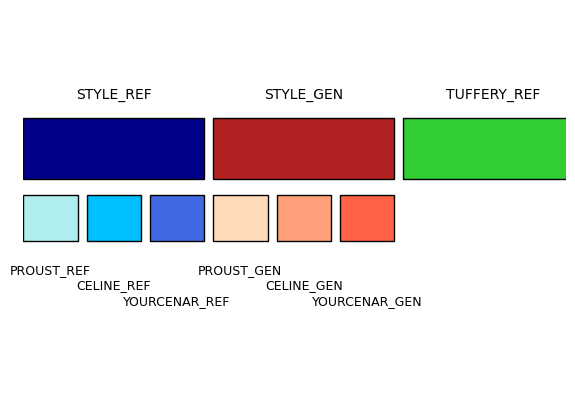

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Turn off axis
ax.set_xlim(0, 6)
ax.set_ylim(0, 5)
ax.axis("off")

# --- Upper section: 3 rectangles (blue, red, green) ---
rect_w, rect_h = 2, 0.8  # width and height of top rectangles
colors_top = ["darkblue", "firebrick", "limegreen"]
labels_top = ["STYLE_REF", "STYLE_GEN", "TUFFERY_REF"]

for i, (c, lbl) in enumerate(zip(colors_top, labels_top)):
    x, y = i*2.1, 2.8
    rect = patches.Rectangle((x, y), rect_w, rect_h, facecolor=c, edgecolor="black")
    ax.add_patch(rect)
    # Add label centered above
    ax.text(x + rect_w/2, y + rect_h + 0.2, lbl, ha="center", va="bottom", fontsize=10)

# --- Lower section: 6 squares, 3 under blue, 3 under red ---
sq_size = 0.6
blue_shades = ["skyblue", "royalblue", "teal"]   # under midnightblue
red_shades  = ["lightcoral", "crimson", "tomato"] # under red

all_bottom_colors = blue_shades + red_shades
colors_bottom = ["paleturquoise", "deepskyblue", "royalblue",   # under blue (unchanged)
                 "peachpuff", "lightsalmon", "tomato"]   # 3 very different reds
labels_bottom = ["PROUST_REF", "CELINE_REF", "YOURCENAR_REF",
                 "PROUST_GEN", "CELINE_GEN", "YOURCENAR_GEN"]

for j in range(2):  # only under blue and red
    for k in range(3):
        x, y = j*2.1 + k*0.7, 2.0
        square = patches.Rectangle((x, y), sq_size, sq_size,
                                   facecolor=colors_bottom[j*3 + k], edgecolor="black")
        ax.add_patch(square)
        # Add label centered below
        ax.text(x + sq_size/2, y - 0.3 - k/5, labels_bottom[j*3 + k],
                ha="center", va="top", fontsize=9)

plt.show()
